# Appendix 1: Python Code

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics
import scipy.stats as st
from scipy import stats
import statsmodels.api as sm
import seaborn as sns

%matplotlib inline
np.random.seed(0)

# Get the data.
df = pd.read_csv("framingham.csv")

# Rename column male to gender for clarity
df = df.rename(columns={"male": "gender"})

# Print the first 5 rows of data
df.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
# Get descriptive statistics for interval variables in the dataset
df[['age','cigsPerDay','totChol','sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']].describe()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4240.000000,4211.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000
mean,49.580189,9.005937,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655
std,8.572942,11.922462,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335
min,32.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000
50%,49.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000
75%,56.000000,20.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000
max,70.000000,70.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


In [5]:
# Drop all NAs
df.dropna(inplace=True)
df.isnull().sum()

gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

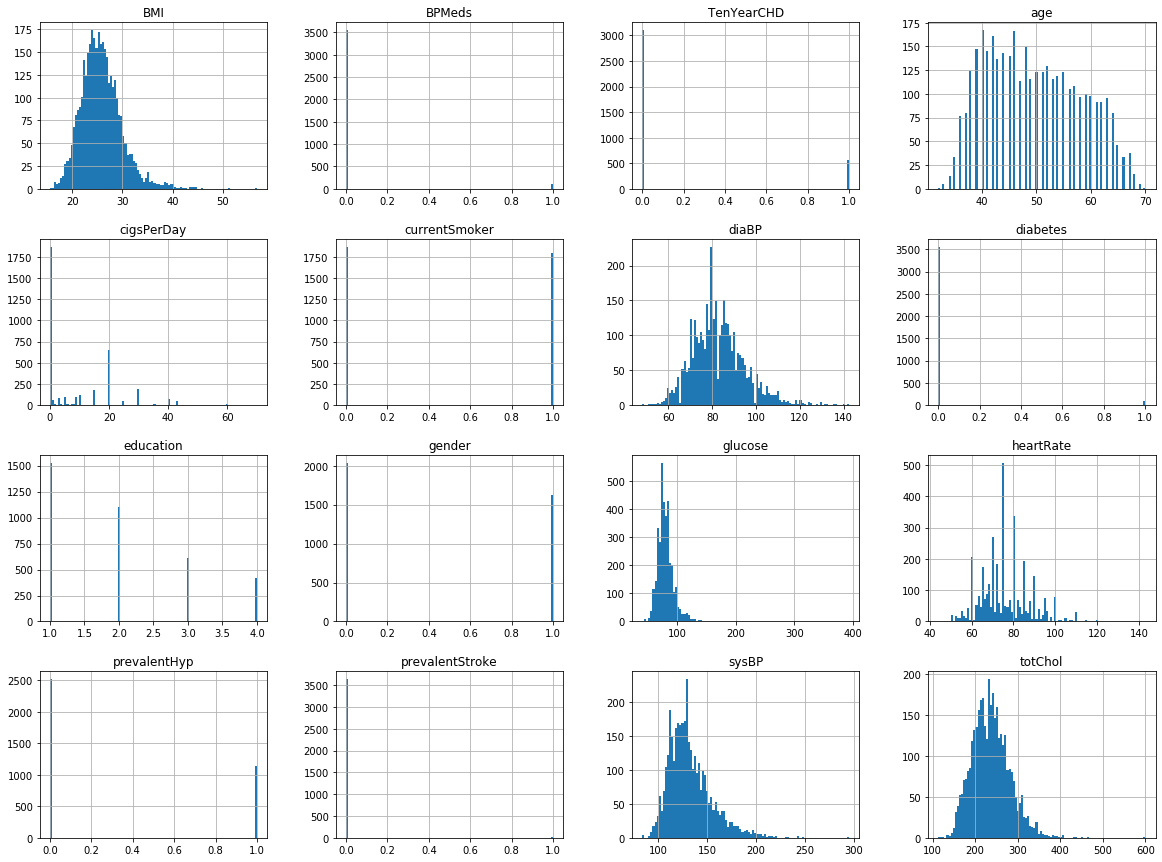

In [6]:
# Review the distribution of the data
df.hist(bins=100, figsize=(20,15))
plt.show()

In [7]:
# Feature selection with correlation matrix
features_names = df.columns.to_list()
corr = df[features_names].corr()
corr.style.background_gradient(cmap='coolwarm')

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
gender,1,-0.0244116,0.0177289,0.206114,0.330322,-0.052124,-0.00231158,0.00142445,0.0138187,-0.0703211,-0.045358,0.0518719,0.0731114,-0.115285,0.00293998,0.0916884
age,-0.0244116,1,-0.159499,-0.210771,-0.189295,0.134732,0.0508934,0.306239,0.109092,0.268252,0.388267,0.208283,0.137511,-0.00272242,0.118349,0.233983
education,0.0177289,-0.159499,1,0.025251,0.0137901,-0.0137395,-0.0303859,-0.0788275,-0.0396268,-0.0135216,-0.12436,-0.0580585,-0.137555,-0.0642143,-0.0319983,-0.0632787
currentSmoker,0.206114,-0.210771,0.025251,1,0.773913,-0.0519233,-0.0381499,-0.108078,-0.0418489,-0.0510341,-0.134428,-0.115955,-0.159821,0.0508413,-0.0532415,0.0191649
cigsPerDay,0.330322,-0.189295,0.0137901,0.773913,1,-0.046504,-0.0362857,-0.0704603,-0.036961,-0.0304004,-0.0947813,-0.0567457,-0.0873948,0.0640304,-0.0537264,0.0520138
BPMeds,-0.052124,0.134732,-0.0137395,-0.0519233,-0.046504,1,0.113125,0.26291,0.0490663,0.0940826,0.271263,0.19963,0.105642,0.0128893,0.0542323,0.0891516
prevalentStroke,-0.00231158,0.0508934,-0.0303859,-0.0381499,-0.0362857,0.113125,1,0.0660569,0.00962541,0.0127364,0.0610695,0.0558336,0.0364964,-0.0170186,0.016061,0.0483657
prevalentHyp,0.00142445,0.306239,-0.0788275,-0.108078,-0.0704603,0.26291,0.0660569,1,0.0805561,0.166655,0.697675,0.617734,0.302949,0.146818,0.0869421,0.181387
diabetes,0.0138187,0.109092,-0.0396268,-0.0418489,-0.036961,0.0490663,0.00962541,0.0805561,1,0.0484515,0.102552,0.0506862,0.0890086,0.0609836,0.61482,0.0934308
totChol,-0.0703211,0.268252,-0.0135216,-0.0510341,-0.0304004,0.0940826,0.0127364,0.166655,0.0484515,1,0.219925,0.174422,0.121056,0.0930528,0.0498845,0.0913381


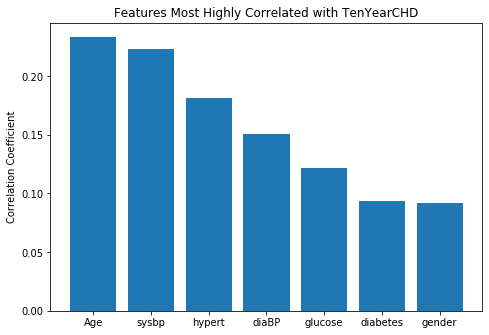

In [8]:
# Top features correlated with TenYearCHD
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
feats = ['Age','sysbp', 'hypert','diaBP','glucose','diabetes','gender']
corrs = [0.23381,0.222885,0.181556,0.150342,0.121942,0.093397,0.091745]
ax.bar(feats,corrs)
ax.set_ylabel('Correlation Coefficient')
ax.set_title('Features Most Highly Correlated with TenYearCHD')
plt.show()

## 1. 

#### What proportion of people report they have CHD (according to given sample of data)?

Population ==> Peoples with CHD

Parameter of Interest ==> A Proportion

Task : Construct a 95% Confidence Interval for the population proportion of people reporting. they have CHD 

In [9]:
df.columns

Index(['gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

Non-CHD    3101
CHD         557
Name: TenYearCHD, dtype: int64


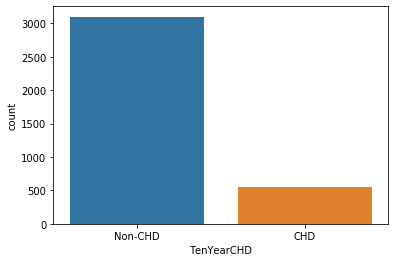

In [10]:
# Understand the value frequencies of the target column (TenYearCHD)
df.TenYearCHD.replace({0:'Non-CHD',1:'CHD'},inplace=True)
print(df.TenYearCHD.value_counts())

sns.countplot(x='TenYearCHD',data=df)
plt.show()

In [11]:
n = df.shape[0]
Heartdisese = df.TenYearCHD.value_counts().loc['CHD']


print("Number of CHD Patient==> ",Heartdisese,"\n")



Number of CHD Patient==>  557 



In [12]:
CHD_pro= Heartdisese/n
print(CHD_pro)

0.15226899945325315


In [13]:
print("\nBest Point Estimate for Proportion of People with CHD==>", CHD_pro*100)


Best Point Estimate for Proportion of People with CHD==> 15.226899945325314


In [14]:
import statsmodels.api as sm
print("\n95% Confidence interval with statsmodels library ==>",sm.stats.proportion_confint(Heartdisese, n),"\n")


95% Confidence interval with statsmodels library ==> (0.14062610340319484, 0.16391189550331145) 



Interpreting Confidence Interval about Proportion of People with CHD With 95% 

confidence, the population proportion of people having CHD is estimated to be 

between 14.10% - 16.26%.



## 2.

#### What is average  systolic blood pressure  for non CHD patients?

Population ==> All Non CHD patients

Parameter of Interest ==> Population Mean  for systolic blood pressure non CHDpatients.

Task : Construct a 95% C.I. for population mean systolic blood pressure for all non CHD

                  age               
                 mean median min max
TenYearCHD                          
CHD         54.278276     55  35  69
Non-CHD     48.702999     48  32  70


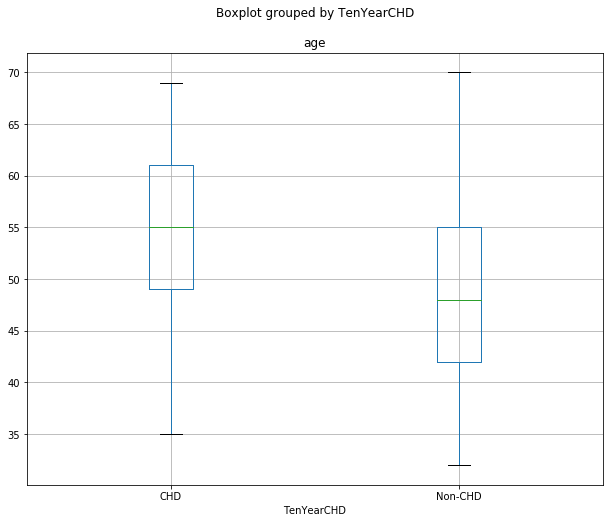

In [15]:
# Initial exploratory analysis of the relationship
fig, ax = plt.subplots(figsize=(10,8))
df.boxplot(column=['age'], by='TenYearCHD', ax=ax)
print(df.groupby('TenYearCHD').agg({'age':['mean','median', 'min','max']}))


In [16]:
df_CHD= df[df.TenYearCHD=='CHD']


In [17]:
df_non_CHD= df[df.TenYearCHD=='Non-CHD']
df_non_CHD.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,Non-CHD
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,Non-CHD
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,Non-CHD
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,Non-CHD
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,Non-CHD


In [18]:
print("\n95% C.I. with statsmodels library ==>",sm.stats.DescrStatsW(df_non_CHD['sysBP']).zconfint_mean())


95% C.I. with statsmodels library ==> (129.56678278805208, 131.00335587689472)


Interpretation

With 95% confidence, the population mean sysBP for all non CHD Patients is estimated to be between 129.67 and 131.01

Note ==> See the distribution, Our Best Point Estimate is center of our confidence intervale.

## 3.

 #### Considering CHD Non_CHD patients, do CHDand non-CHD patients differ significantly in mean sysBP?

Population ==> CHD and Non-CHD Patients

Parameter of Interest ==> (μ1 − μ2 ): sysBP

μ1 ==> Mean sysBP of CHD Patients.

μ1 ==> Mean sysBP of CHD Patients.

                 sysBP                    
                  mean median   min    max
TenYearCHD                                
CHD         143.981149  139.0  83.5  295.0
Non-CHD     130.285069  127.0  83.5  243.0


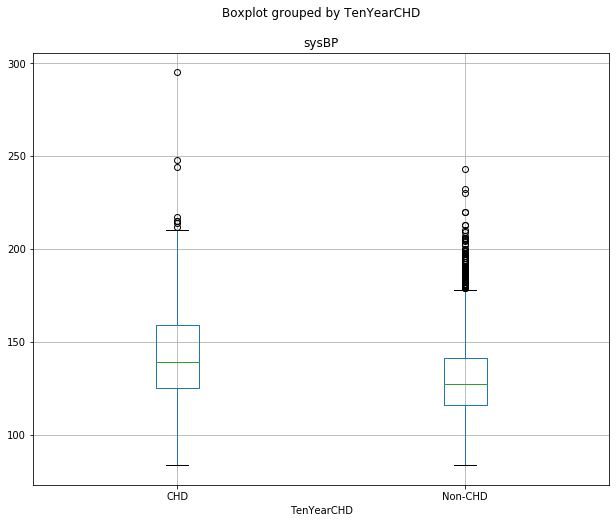

In [19]:
# Initial exploratory analysis of the relationship
fig, ax = plt.subplots(figsize=(10,8))
df.boxplot(column=['sysBP'], by='TenYearCHD', ax=ax)
print(df.groupby('TenYearCHD').agg({'sysBP':['mean','median', 'min','max']}))


In [20]:
print("\nSample Information==>")
df.groupby('TenYearCHD').describe()['sysBP'].transpose().loc[['mean','std'],:]


Sample Information==>


TenYearCHD,CHD,Non-CHD
mean,143.981149,130.285069
std,26.966224,20.408004


## 4.

#### Considering CHD Non_CHD patients, do CHD have higher sysBP mean  than Non CHD Patients?

Population ==> CHD Non_CHD patients

Parameter of Interest ==> (μ1 − μ2 ): sysBP

Task: Perform an independent samples test regarding the value for the difference in mean sysBP between CVD Non_CVD patients.

μ1 ==> Mean sysBP of CHD.

μ2 ==> Mean sysBPh of Non_CHD patients.

Null: There is no difference in mean sysBP

Alternative: There is a significant difference in mean sysBP
Significance Level = 5%

In [21]:
import statsmodels.api as sm

In [22]:
z,p_value = sm.stats.ztest(df_CHD['sysBP'],df_non_CHD['sysBP'])

print("P-Value is ==> ",p_value)

P-Value is ==>  1.922670905699858e-43


Our p-value is smaller than the 0.05 significance level, which means there is strong evidence against the null.

Thus, we reject the null!

Based on our estimated difference in sample means, we support that there is a significant difference between the population mean sysBP for CVD and non_CVD patients.

## 5. 

#### What is average age for non_CHD patients?

Population ==> All Non_CHD patients

Parameter of Interest ==> Population Mean for age non CHDpatients.

Task : Construct a 95% C.I. for population mean systolic blood pressure for all non diabetic patients.

In [23]:
df_CHD= df[df.TenYearCHD=='CHD']


In [24]:
df_non_CHD= df[df.TenYearCHD=='Non-CHD']
df_non_CHD.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,Non-CHD
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,Non-CHD
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,Non-CHD
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,Non-CHD
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,Non-CHD


In [25]:
print("\n95% C.I. with statsmodels library ==>",sm.stats.DescrStatsW(df_non_CHD['age']).zconfint_mean())


95% C.I. with statsmodels library ==> (48.40791857118486, 48.99807949395542)


Interpretation

With 95% confidence, the population mean age for all non CHD Patients is estimated to be between 48.49 and 49
04

Note ==> See the distribution, Our Best Point Estimate is center of our confidence intervale.

## 6.

#### Considering CHD-Non CHD patients, do CHD and non-CHD patients differ significantly in mean age?

Population ==> CHD and Non-CHD Patients

Parameter of Interest ==> (μ1 − μ2 ): age

μ1 ==> Mean age of CHD Patients.

μ2 ==> Mean age of non_CHD Patients.

In [26]:
print("\nSample Information==>")
df.groupby('TenYearCHD').describe()['age'].transpose().loc[['mean','std'],:]


Sample Information==>


TenYearCHD,CHD,Non-CHD
mean,54.278276,48.702999
std,7.992338,8.383845


In [27]:
import statsmodels.api as sm

In [28]:
z,p_value = sm.stats.ztest(df_CHD['age'],df_non_CHD['age'])

print("P-Value is ==> ",p_value)

P-Value is ==>  5.698450859102773e-48


Our p-value is smaller than the 0.05 significance level, which means there is strong evidence against the null.

Thus, we reject the null!

Based on our estimated difference in sample means, we support that there is a significant difference between the population mean age for CHD and non_CHD patients.


## linear regression: 

The increase in blood pressure with age is mostly associated with structural changes in the arteries and especially with large artery stiffness.Age-related increases in blood pressure have been observed in almost every population. So we did correlation and liner regression.

Number of people who have heart disease according to age ¶


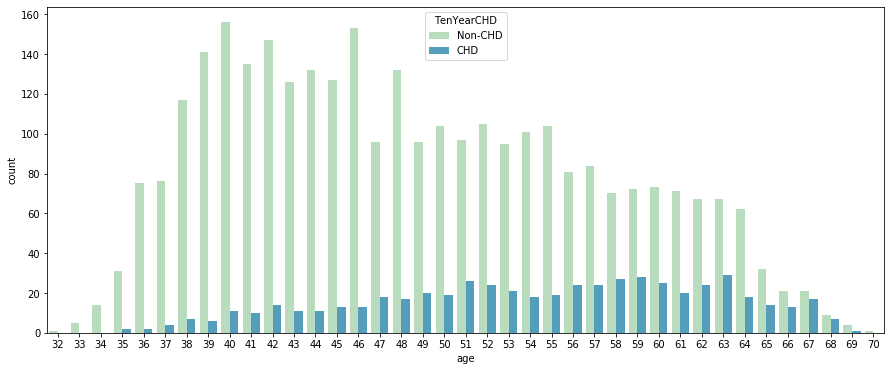

In [29]:
import seaborn as sns
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df, hue = 'TenYearCHD',palette='GnBu')
plt.show()

Slope: 1.0026747468907684 
 R squared: 0.3885505988687025 
 P value: 4.6917475671595405e-132 
 Standard error: 0.03933592252471284


Text(0.5, 0.98, 'At Risk of cardiovascular disease  by age & Systolic Blood Pressure')

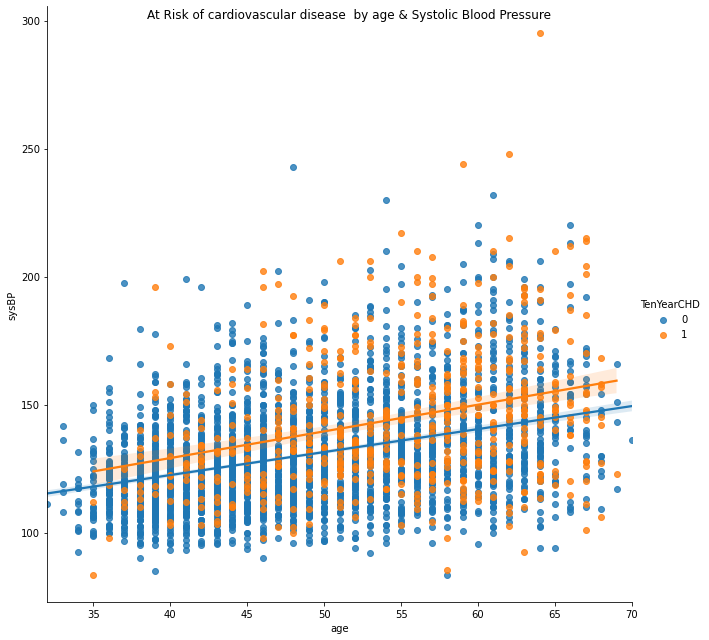

In [5]:
# Linear regression for age and sysBP
slope, intercept, r_value, p_value, std_err = stats.linregress(df['age'],df['sysBP'])

print("Slope:",slope, "\n","R squared:", r_value, "\n","P value:", p_value, "\n","Standard error:", std_err)

# Plot regression lines by CHD and non_CHD
sns.lmplot(x="age", y='sysBP', hue='TenYearCHD',data=df, height = 9) 
plt.suptitle('At Risk of cardiovascular disease  by age & Systolic Blood Pressure')


for our visualization purpose will fit line using seaborn library only for age

as independent variable and sysBP as dependent variable. In above plot we fit 

regression line into the variables.